In [1]:
using PGFPlotsX
using DrWatson
quickactivate("../../")
using CSV

Activating environment at `~/repos/advection-diffusion-catalysis/Project.toml`


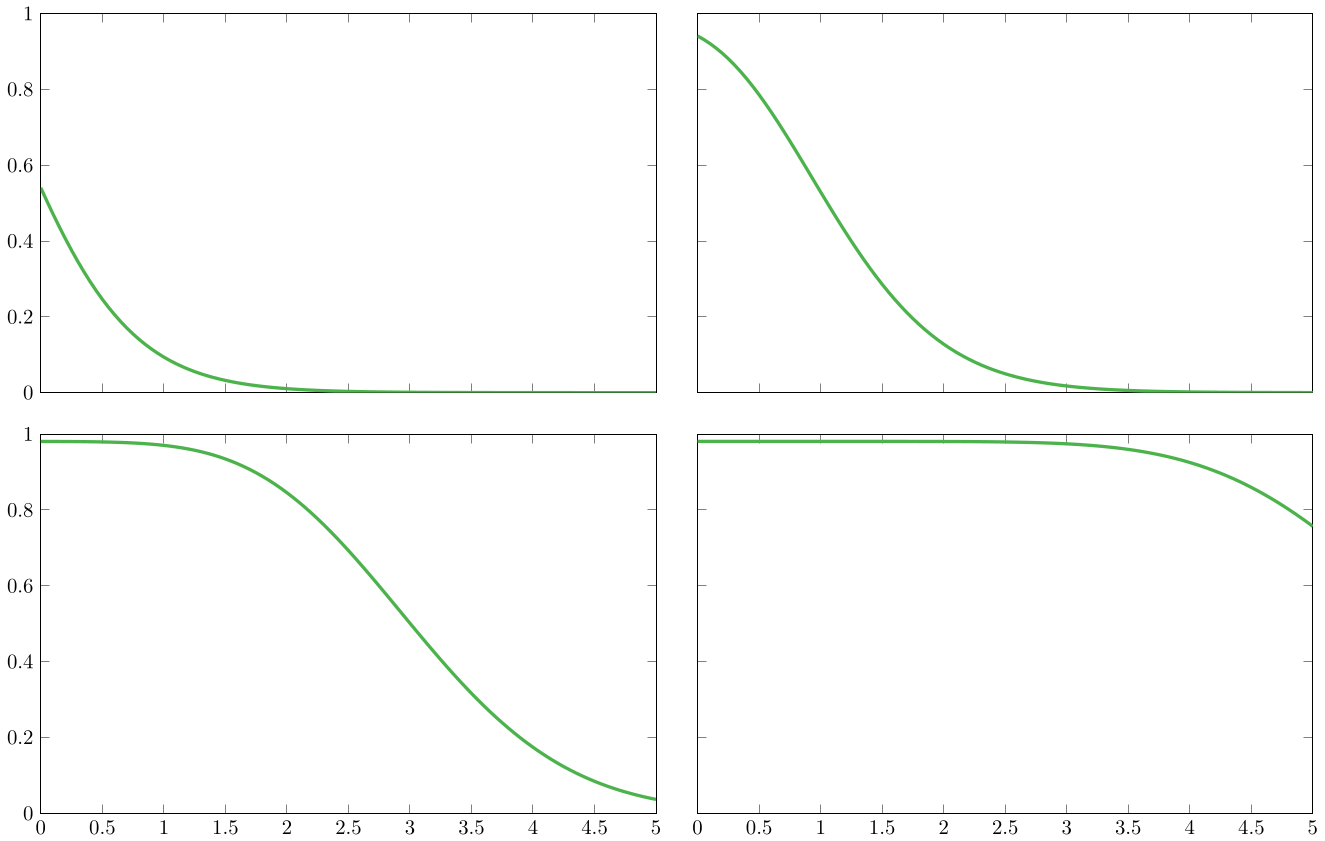

In [104]:
c_300 = []; c_350 = []; c_450=[]; c_600=[]
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/c/c_field_Dᵢ=0.001_k=28.558_kᵧ=1t=300"), header=false)
    push!(c_300, row.Column1)
end
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/c/c_field_Dᵢ=0.001_k=28.558_kᵧ=1t=350"), header=false)
    push!(c_350, row.Column1)
end
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/c/c_field_Dᵢ=0.001_k=28.558_kᵧ=1t=450"), header=false)
    push!(c_450, row.Column1)
end
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/c/c_field_Dᵢ=0.001_k=28.558_kᵧ=1t=600"), header=false)
    push!(c_600, row.Column1)
end
t_c_300 = Table([0:5/100:5, c_300]);
t_c_350 = Table([0:5/100:5, c_350]);
t_c_450 = Table([0:5/100:5, c_450]);
t_c_600 = Table([0:5/100:5, c_600]);

@pgf plot1 = Plot({ultra_thick, green!40!gray},t_c_300)
@pgf plot2 = Plot({ultra_thick, green!40!gray},t_c_350)
@pgf plot3 = Plot({ultra_thick, green!40!gray},t_c_450)
@pgf plot4 = Plot({ultra_thick, green!40!gray},t_c_600)

figure = @pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 2",
            horizontal_sep="2em",
            vertical_sep="2em",
            xticklabels_at="edge bottom",
            yticklabels_at="edge left"
        },
        xmin = 0,
        ymin = 0,
        height = "8cm",
        width = "12cm",
        no_markers
    },
    {xmin=0, xmax=5, ymin=0, ymax=1},
    plot1,
    {xmin=0, xmax=5, ymin=0, ymax=1},
    plot2,
    {xmin=0, xmax=5, ymin=0, ymax=1},
    plot3,
    {xmin=0, xmax=5, ymin=0, ymax=1},
    plot4
    
    
)
pgfsave("c_PDE.tex", figure, include_preamble = false)
figure

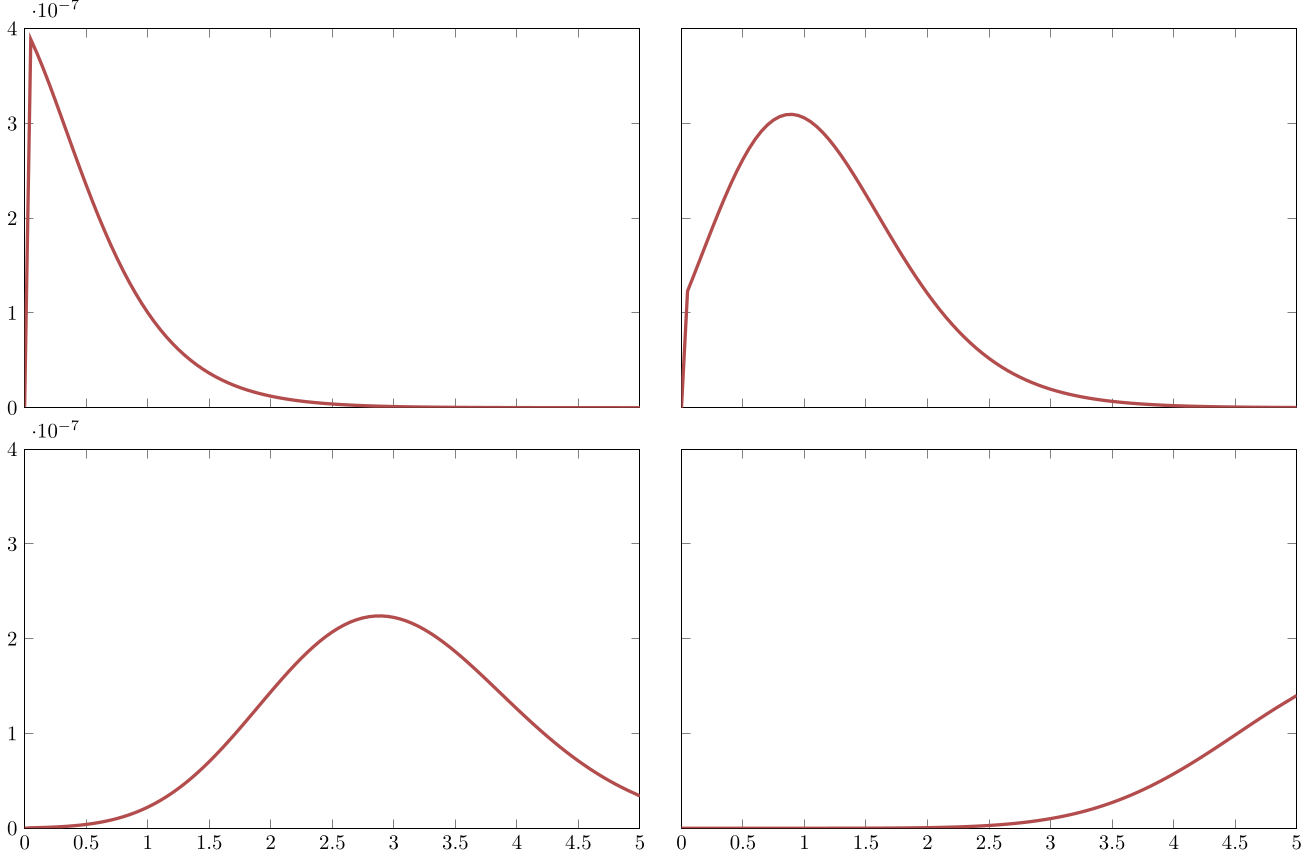

In [100]:
R_300 = []; R_350 = []; R_450=[]; R_600=[]
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/R/R_field_Dᵢ=0.001_k=28.558_kᵧ=1t=300"), header=false)
    push!(R_300, row.Column1)
end
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/R/R_field_Dᵢ=0.001_k=28.558_kᵧ=1t=350"), header=false)
    push!(R_350, row.Column1)
end
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/R/R_field_Dᵢ=0.001_k=28.558_kᵧ=1t=450"), header=false)
    push!(R_450, row.Column1)
end
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/R/R_field_Dᵢ=0.001_k=28.558_kᵧ=1t=600"), header=false)
    push!(R_600, row.Column1)
end
t_R_300 = Table([0:5/100:5, R_300]);
t_R_350 = Table([0:5/100:5, R_350]);
t_R_450 = Table([0:5/100:5, R_450]);
t_R_600 = Table([0:5/100:5, R_600]);

@pgf plot1 = Plot({ultra_thick, red!40!gray},t_R_300)
@pgf plot2 = Plot({ultra_thick, red!40!gray},t_R_350)
@pgf plot3 = Plot({ultra_thick, red!40!gray},t_R_450)
@pgf plot4 = Plot({ultra_thick, red!40!gray},t_R_600)

figure = @pgf GroupPlot(
    {
        group_style =
        {
            group_size="2 by 2",
            horizontal_sep="2em",
            vertical_sep="2em",
            xticklabels_at="edge bottom",
            yticklabels_at="edge left"
        },
        xmin = 0,
        ymin = 0,
        height = "8cm",
        width = "12cm",
        no_markers
    },
    {xmin=0, xmax=5, ymin=0, ymax=4e-7},
    plot1,
    {xmin=0, xmax=5, ymin=0, ymax=4e-7},
    plot2,
    {xmin=0, xmax=5, ymin=0, ymax=4e-7},
    plot3,
    {xmin=0, xmax=5, ymin=0, ymax=4e-7},
    plot4
    
    
)
pgfsave("R_PDE.tex", figure, include_preamble = false)
figure

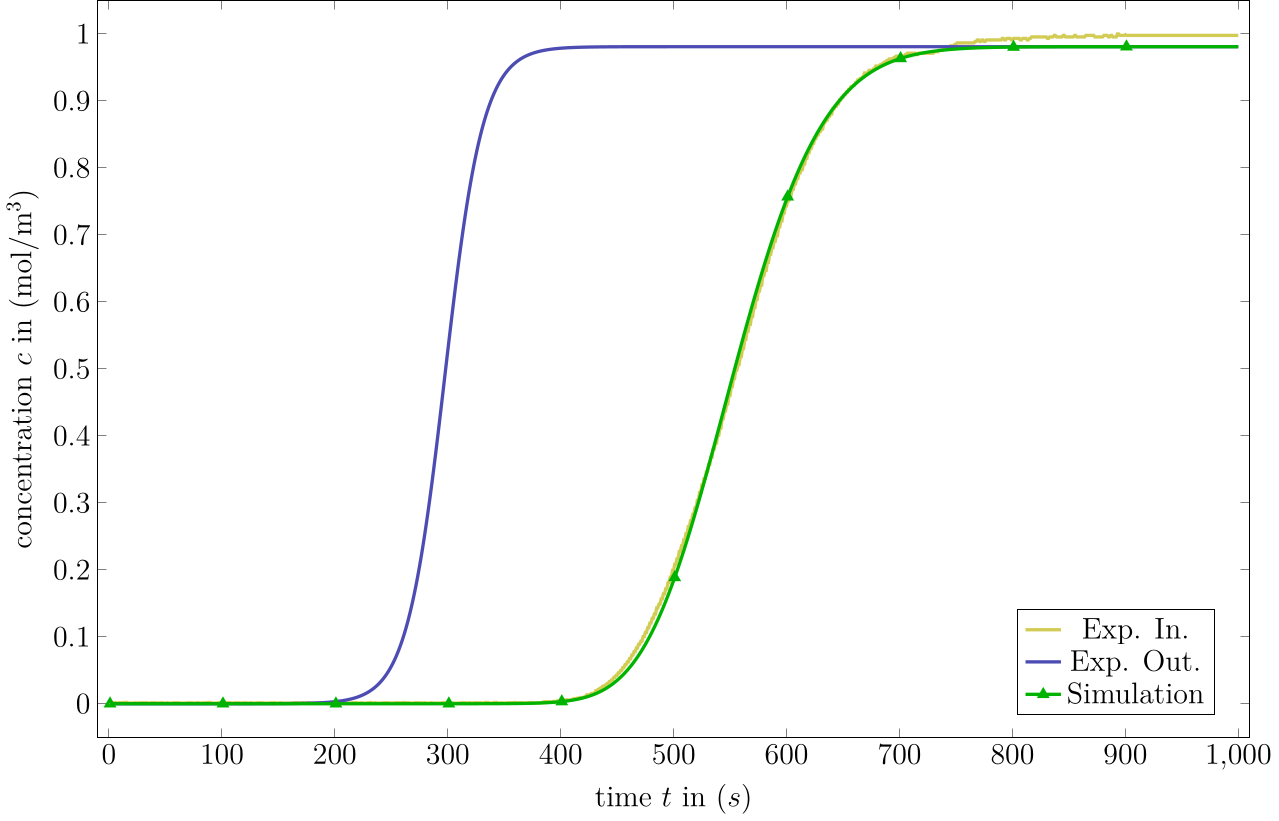

In [99]:
c_pSim = []; input_exp=[]; output_exp=[];
for row in CSV.File(datadir("experiment/new-data.csv"); delim=" ")
    push!(input_exp, row.I)
    push!(output_exp, row.O)
end
for row in CSV.File(datadir("simulation/fields/D_i=0.000679k=28.558_k_gamma=1/c_Psim/concentration_Psim_Dᵢ=0.001_k=28.558_kᵧ=1"), header=false)
    push!(c_pSim, row.Column1)
end
t_c_pSim = Table([1:1000, c_pSim[1:1000]]);
t_exp_out = Table([1:1000, input_exp[1:1000]]);
t_exp_in = Table([1:1000, output_exp[1:1000]]);
figure = @pgf Axis({width=600, height=400, 
            xlabel="time \$t\$ in \$(s)\$",ylabel="concentration \$c\$ in (mol/m\$^3)\$",
            xlabel_style= {font = raw"\Large"},
            ylabel_style= {font = raw"\Large"},
            legend_style= {font = raw"\Large"},
            yticklabel_style= {font = raw"\Large"},
            xticklabel_style= {font = raw"\Large"},
            ymax=1.05, ymin=-0.05,
            xmax=1010, xmin=-10,
            xtick="{0,100,200,300,400,500,600,700,800,900,1000}",
            legend_pos="south east"},
        PlotInc({no_markers, color="yellow!60!gray", ultra_thick},
                t_exp_in),
        LegendEntry("Exp. In."),
        PlotInc({no_markers, color="blue!40!gray", ultra_thick},
                t_exp_out),
        LegendEntry("Exp. Out."),
        PlotInc({mark="triangle", mark_repeat=100, color="green!70!black", ultra_thick}, t_c_pSim),
        LegendEntry("Simulation"),
    )
pgfsave("c_Psim_PDE.tex", figure, include_preamble = false)
figure